In [1]:
#importamos las librearías que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from ydata_profiling import ProfileReport
import warnings

In [2]:
#Cargar DataSet
ruta_yelp_negocios = "C:\\Users\\licle\\Desktop\\PF\\DATA FRANSCISCO\\yelp_business.parquet"

yelp_negocios = pd.read_parquet(ruta_yelp_negocios)

In [3]:
yelp_negocios.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,None,93101,34.426679,-119.711197,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,None,63123,38.551126,-90.335695,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,None,85711,32.223236,-110.880452,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."


In [4]:
yelp_negocios.shape

(150346, 14)

In [5]:
yelp_negocios.isnull().sum()

business_id         0
name                0
address             0
city                0
state               3
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64

In [6]:
#¿Se repiten los usuarios?
yelp_negocios.name.value_counts()

name
Starbucks                  724
McDonald's                 703
Dunkin'                    510
Subway                     459
Taco Bell                  365
                          ... 
San Roque Florist            1
Perfect Taste Grill          1
il Fustino                   1
Chong's Oriental Market      1
Sic Ink                      1
Name: count, Length: 114117, dtype: int64

In [7]:
yelp_negocios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [8]:
yelp_negocios.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


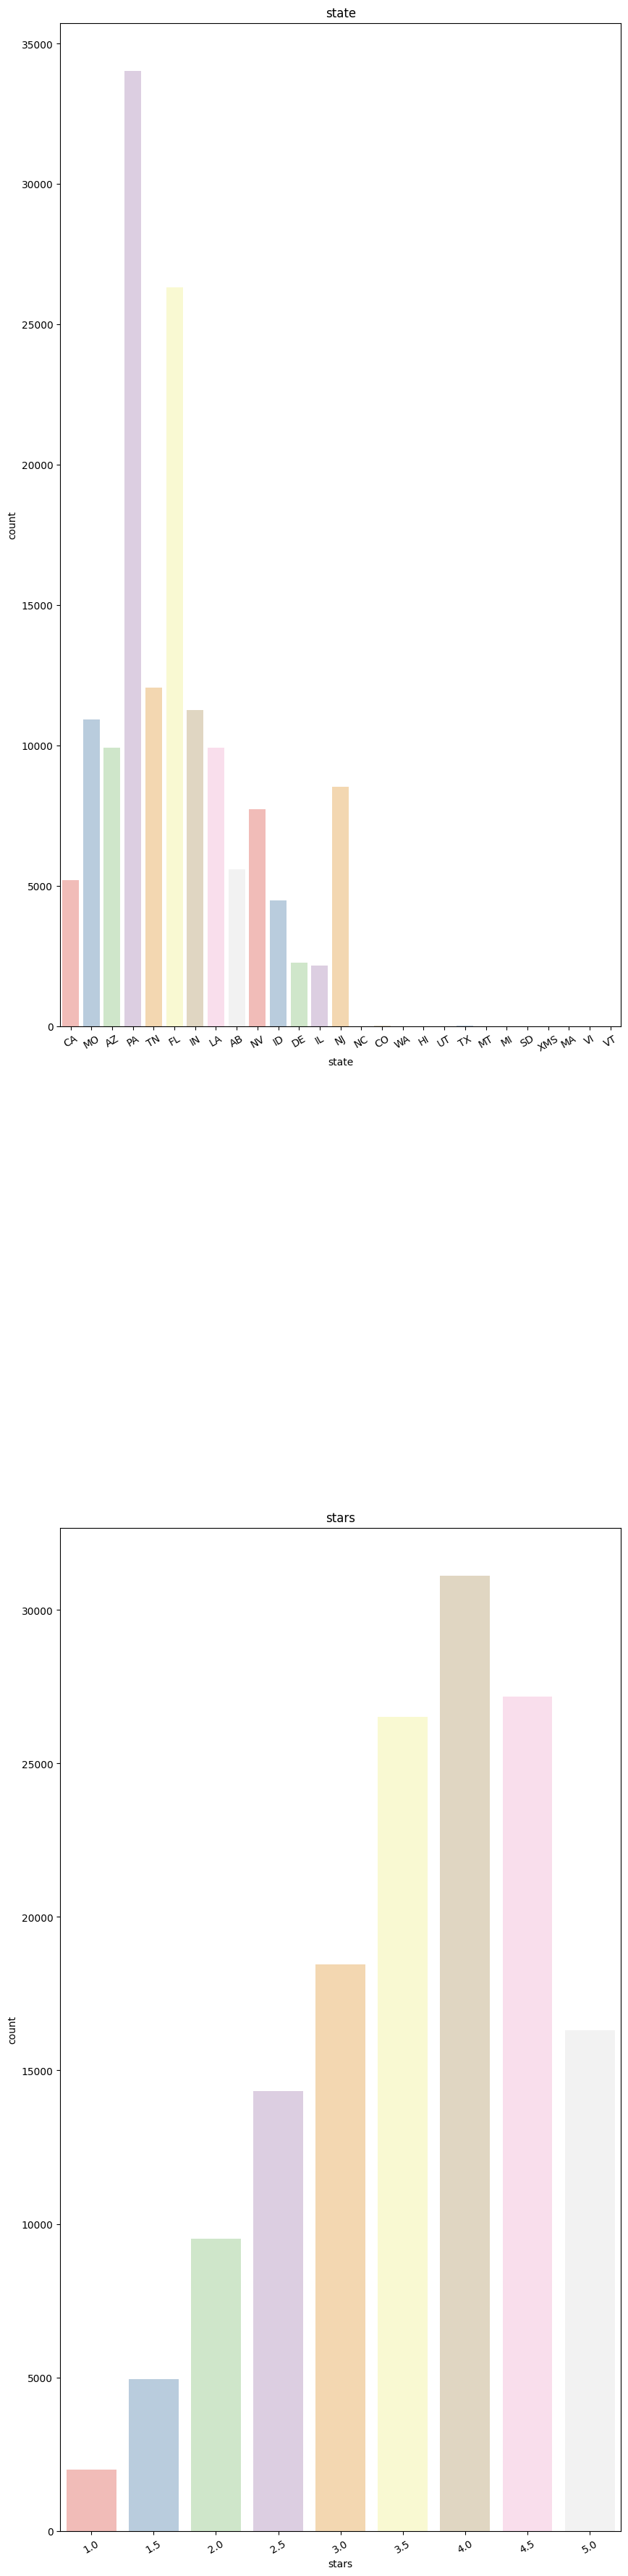

In [9]:
#Graficar subniveles de cada variable categórica
cols_cat = ["state","stars"]

#Filtramos mensajes de advertencias para que nuestro resultado sea más prólijo
warnings.filterwarnings("ignore")

#Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(cols_cat),ncols =1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=yelp_negocios,ax=ax[i], palette='Pastel1')
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

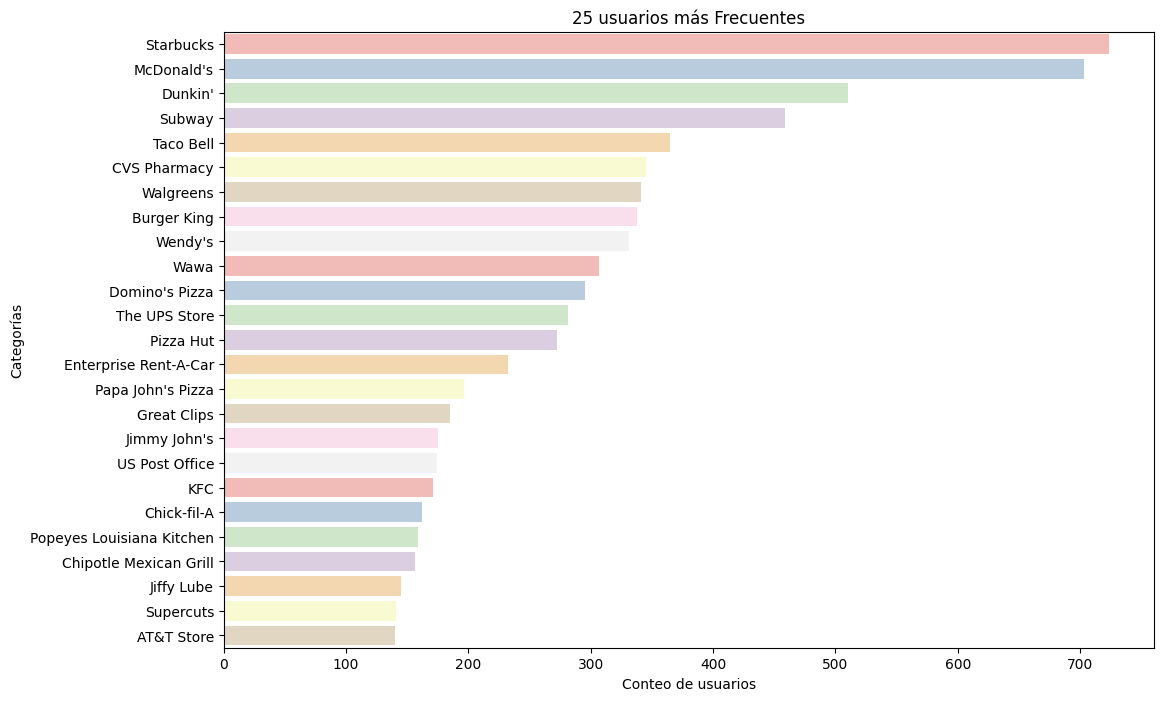

In [10]:
#reducimos a las primeras 25 más frecuentes para eso contamos las variables más repetidas y gráficamos
warnings.filterwarnings("ignore")

# Contar las los nombres repetidos 
categoria_counts = yelp_negocios['name'].value_counts()

# Seleccionar los 25 nombres más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar los 25 nombres más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette='Pastel1')
plt.xlabel('Conteo de usuarios')
plt.ylabel('Categorías')
plt.title('25 usuarios más Frecuentes')
plt.show()

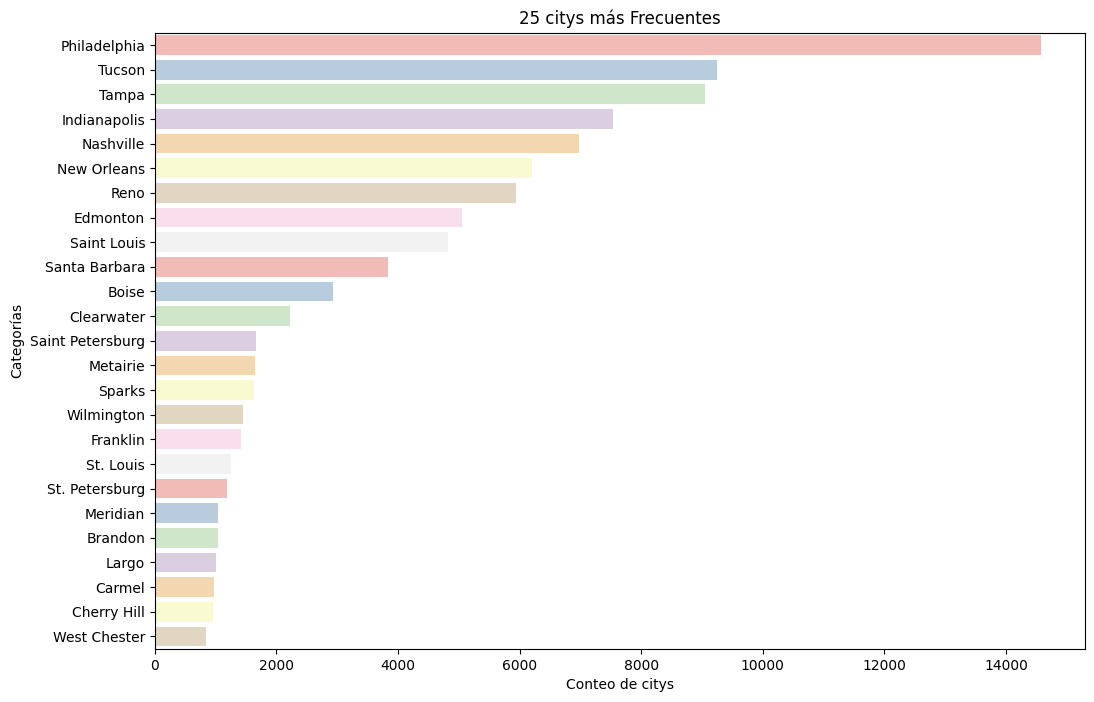

In [13]:
#reducimos a las primeras 25 más frecuentes para eso contamos las variables más repetidas y gráficamos
warnings.filterwarnings("ignore")

# Contar las citys repetidos 
categoria_counts = yelp_negocios['city'].value_counts()

# Seleccionar las 25 citys más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar los 25 citys más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette='Pastel1')
plt.xlabel('Conteo de citys')
plt.ylabel('Categorías')
plt.title('25 citys más Frecuentes')
plt.show()

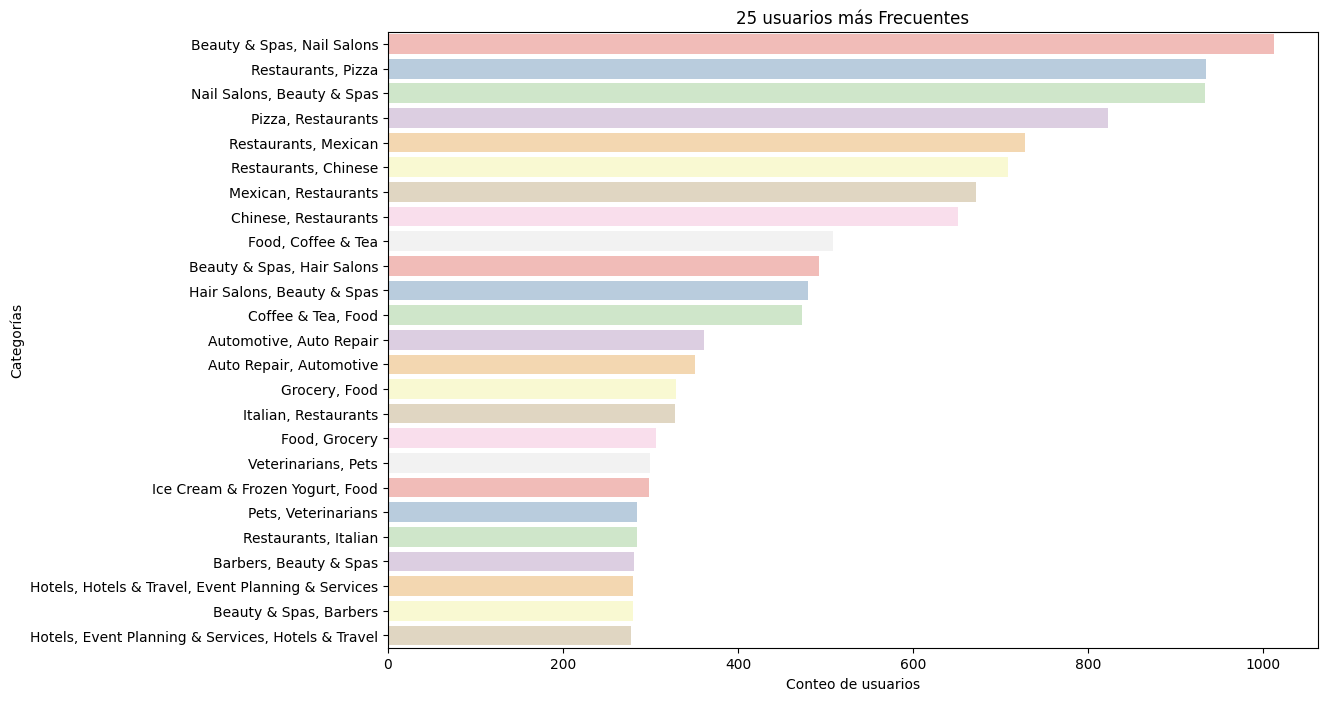

In [14]:
#reducimos a las primeras 25 más frecuentes para eso contamos las variables más repetidas y gráficamos
warnings.filterwarnings("ignore")

# Contar las categorías repetidas 
categoria_counts =yelp_negocios['categories'].value_counts()

# Seleccionar los 25 nombres más frecuentes
top_25_categorias = categoria_counts.head(25)

# Graficar los 25 caaategorías más frecuentes
plt.figure(figsize=(12, 8))
sns.barplot(x=top_25_categorias.values, y=top_25_categorias.index, palette='Pastel1')
plt.xlabel('Conteo de usuarios')
plt.ylabel('Categorías')
plt.title('25 usuarios más Frecuentes')
plt.show()